In [1]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [2]:
# t = uproot.open("../output/run2_all_with_m_llg.root")["t"]
t = uproot.open("../output.root")["t"]

In [3]:
df = t.arrays(library = "pd")

In [4]:
df.loc[df["process_id"] == 0, "Category"].unique()

array([8., 4., 7., 1., 6., 3., 5., 2.], dtype=float32)

In [5]:
process_ids = {}
process_ids["Data"] = 0

process_ids["HH_ggTauTau"] = -1
#process_ids["HH_ggZZ"] = -2
#process_ids["HH_ggZZ_4l"] = -5
#process_ids["HH_ggZZ_2l2q"] = -6
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4

process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [6]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["HH_ggZZ_4l"] = True
is_resonant["HH_ggZZ_2l2q"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True

In [7]:
colors = {}
colors["Data"] = "k"
colors["DiPhoton"] = "C0"
colors["GJets"] = "C1"
colors["HH_ggTauTau"] = "k"
colors["HH_ggZZ"] = "b"
colors["HH_ggWW"] = "g"
colors["TTbar"] = "C3"
colors["VH"] = "C4"
colors["WGamma"] = "C5"
colors["ZGamma"] = "C6"
colors["ttH"] = "C7"
colors["ggH"] = "C8"
colors["VBFH"] = "C2"

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


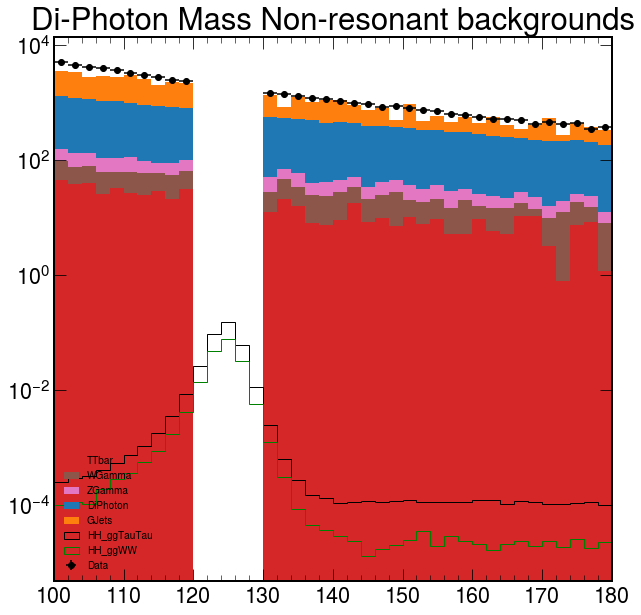

In [8]:
mgg_binning = "40,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if is_resonant[process] and "HH_gg" not in process:
        continue
    toFill = df.loc[df["process_id"] == process_id, "mgg"] # select by process, then select the quantity
    weight = df.loc[df["process_id"] == process_id, "weight"]
    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight)        

# plots
# stack non-signals
mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, ax = plt.subplots()

plot_stack(hist_stack, ax=ax, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k")

# mgg_hists["HH_ggZZ"] += mgg_hists["HH_ggZZ"] + mgg_hists["HH_ggZZ_4l"] + mgg_hists["HH_ggZZ_2l2q"]
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]
mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step")
# mgg_hists["HH_ggZZ"].plot(histtype="step", color=colors["HH_ggZZ"])
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWW")
plt.title("Di-Photon Mass Non-resonant backgrounds")
ax.set_yscale("log")
ax.legend(fontsize=10)
plt.savefig("mgg_all_MC.pdf")

In [9]:
# signal sensitivity measurement

In [10]:
df["process_id"].unique()

array([-2., -3., -4.,  7., 11.,  0.,  8.,  9.,  5.,  4., 12.,  3.,  2.,
        6., -1., 10.], dtype=float32)

In [11]:
ZGammaDF = df.loc[(df["process_id"] == 2) & ((df["Category"] == 4) | (df["Category"] == 5)), ["mllGamma_leading", "mllGamma_subleading", "weight"]]
signalDF = df.loc[(df["process_id"] < 0) & ((df["Category"] == 4) | (df["Category"] == 5)), ["mllGamma_leading", "mllGamma_subleading", "weight"]]

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


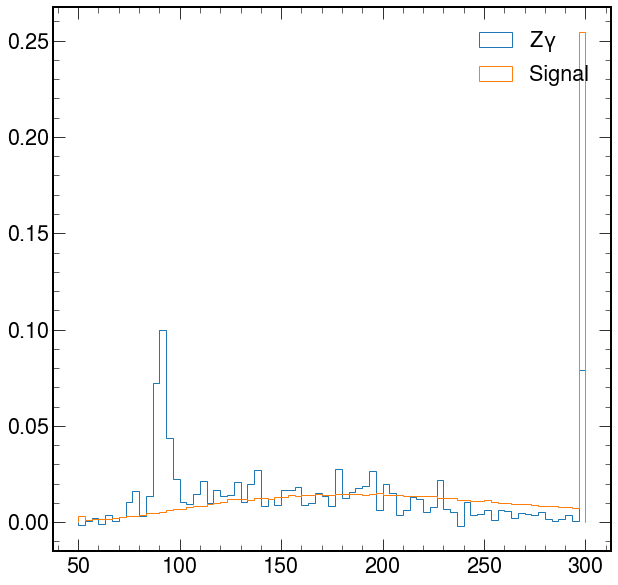

In [12]:
ZGHist = Hist1D(ZGammaDF["mllGamma_leading"], bins="75,50,300", weights=ZGammaDF["weight"], label="Z$\gamma$")
signalHist = Hist1D(signalDF["mllGamma_leading"], bins="75,50,300", weights=signalDF["weight"], label="Signal")
ZGHist /= ZGHist.integral
signalHist /= signalHist.integral
ZGHist.plot()
signalHist.plot()
plt.savefig("mllGamma_leading.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


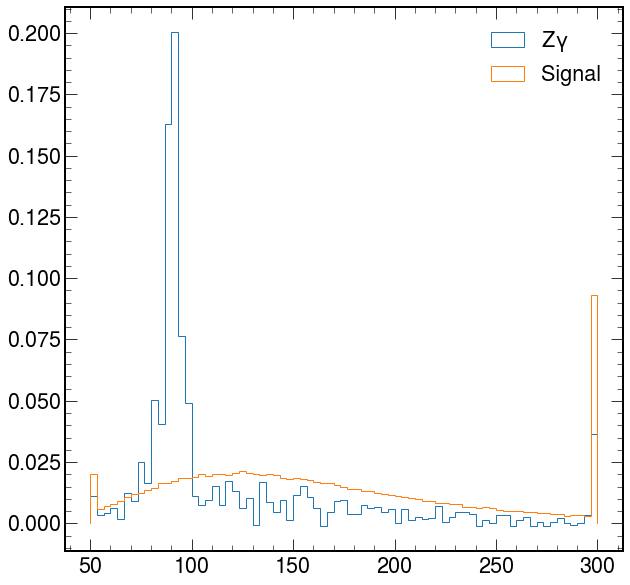

In [13]:
ZGHist = Hist1D(ZGammaDF["mllGamma_subleading"], bins="75,50,300", weights=ZGammaDF["weight"], label="Z$\gamma$")
signalHist = Hist1D(signalDF["mllGamma_subleading"], bins="75,50,300", weights=signalDF["weight"], label="Signal")
ZGHist /= ZGHist.integral
signalHist /= signalHist.integral
ZGHist.plot()
signalHist.plot()
plt.savefig("mllGamma_subleading.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


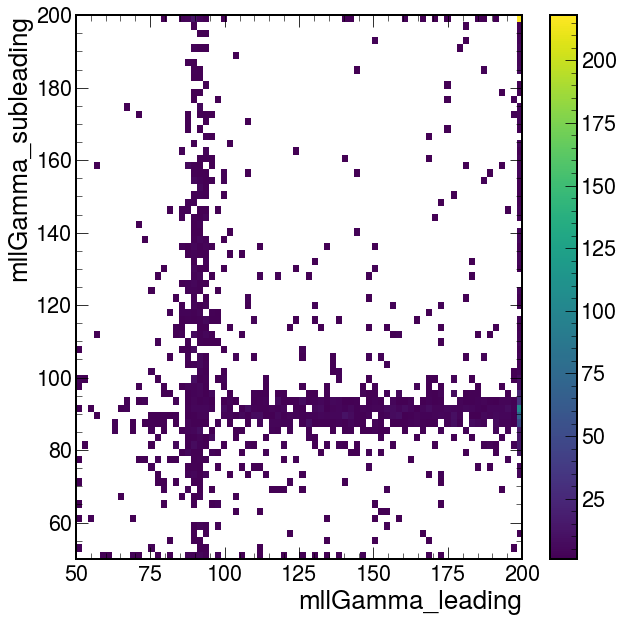

In [14]:
from yahist import Hist2D
Hist2D(ZGammaDF[["mllGamma_leading", "mllGamma_subleading"]], bins=(linspace(50,200,75), linspace(50,200,75))).plot()
plt.savefig("mllGamma_leading_v_subleading.pdf")

In [15]:
# signal sensitivity
def signal_sensitivity(signal_df, background_df):
    signalCounts = Hist1D(signal_df["mllGamma_leading"], bins="1,0,1000", weights=signal_df["weight"]).integral
    backgroundCounts = Hist1D(background_df["mllGamma_leading"], bins="1,0,1000", weights=background_df["weight"]).integral
    print("signal counts = {}\nbackground counts = {}\nS/B = {}".format(signalCounts, backgroundCounts, signalCounts / backgroundCounts))
    return signalCounts / backgroundCounts

In [16]:
y = []
for window in range(0,40,5):
    print("\nWindow around central Z mass [GeV] = ", window)
    lowerLimit = 91 - window
    upperLimit = 91 + window
    s1 = signalDF.loc[((signalDF["mllGamma_leading"] < lowerLimit) | (signalDF["mllGamma_leading"] > upperLimit)) & ((signalDF["mllGamma_subleading"] < lowerLimit) | (signalDF["mllGamma_subleading"] > upperLimit))]
    b1 = ZGammaDF.loc[((ZGammaDF["mllGamma_leading"] < lowerLimit) | (ZGammaDF["mllGamma_leading"] > upperLimit)) & ((ZGammaDF["mllGamma_subleading"] < lowerLimit) | (ZGammaDF["mllGamma_subleading"] > upperLimit))]

    y.append(signal_sensitivity(s1, b1))


Window around central Z mass [GeV] =  0
signal counts = 0.04982966788888632
background counts = 244.543153911829
S/B = 0.00020376635817354594

Window around central Z mass [GeV] =  5
signal counts = 0.046569718343263844
background counts = 89.5461317896843
S/B = 0.0005200639872712924

Window around central Z mass [GeV] =  10
signal counts = 0.043479080042189366
background counts = 62.526793763041496
S/B = 0.0006953671766213143

Window around central Z mass [GeV] =  15
signal counts = 0.04062946829482428
background counts = 52.315062910318375
S/B = 0.0007766304011613969

Window around central Z mass [GeV] =  20
signal counts = 0.03806676745178095
background counts = 46.37970674037933
S/B = 0.0008207634357170065

Window around central Z mass [GeV] =  25
signal counts = 0.0356430635144136
background counts = 39.52370038628578
S/B = 0.000901814940556054

Window around central Z mass [GeV] =  30
signal counts = 0.03347399638730053
background counts = 37.23100262880325
S/B = 0.0008990893079

Text(0, 1, 'Signal sensitivity')

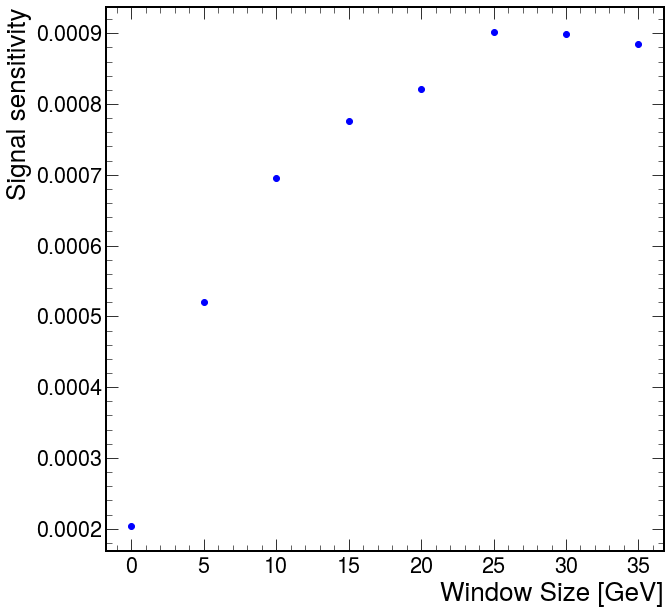

In [17]:
plt.plot(list(range(0,40,5)), y, "bo")
plt.xlabel("Window Size [GeV]")
plt.ylabel("Signal sensitivity")

In [18]:
df["max_gamma_idmva"] = np.zeros(len(df))
df["min_gamma_idmva"] = np.zeros(len(df))
df.loc[df["g1_idmva"] > df["g2_idmva"], "max_gamma_idmva"] = df.loc[df["g1_idmva"] > df["g2_idmva"], "g1_idmva"]
df.loc[df["g1_idmva"] > df["g2_idmva"], "min_gamma_idmva"] = df.loc[df["g1_idmva"] > df["g2_idmva"], "g2_idmva"]

df.loc[df["g2_idmva"] > df["g1_idmva"], "max_gamma_idmva"] = df.loc[df["g2_idmva"] > df["g1_idmva"], "g2_idmva"]
df.loc[df["g2_idmva"] > df["g1_idmva"], "min_gamma_idmva"] = df.loc[df["g2_idmva"] > df["g1_idmva"], "g1_idmva"]

In [19]:
lowerLimit = 91 - 20
upperLimit = 91 + 20
master_df = df.loc[((df["mllGamma_leading"] <= lowerLimit) | (df["mllGamma_leading"] >= upperLimit)) & ((df["mllGamma_subleading"] <= lowerLimit) | (df["mllGamma_subleading"] >= upperLimit))]

In [20]:
with uproot.recreate("output_mllGamma_filtered.root") as f: # UNSCALED!
    f["t"] = master_df

In [21]:
t = uproot.open("GJets_background.root")["t"]
gjets_df = t.arrays(library="pd")

### Category wise normalization


In [22]:
df["max_gamma_idmva"] = np.zeros(len(df))
df["min_gamma_idmva"] = np.zeros(len(df))
df.loc[df["g1_idmva"] > df["g2_idmva"], "max_gamma_idmva"] = df.loc[df["g1_idmva"] > df["g2_idmva"], "g1_idmva"]
df.loc[df["g1_idmva"] > df["g2_idmva"], "min_gamma_idmva"] = df.loc[df["g1_idmva"] > df["g2_idmva"], "g2_idmva"]

df.loc[df["g2_idmva"] > df["g1_idmva"], "max_gamma_idmva"] = df.loc[df["g1_idmva"] > df["g2_idmva"], "g2_idmva"]
df.loc[df["g2_idmva"] > df["g1_idmva"], "min_gamma_idmva"] = df.loc[df["g1_idmva"] > df["g2_idmva"], "g1_idmva"]

**$\gamma$ + Jets only**

In [34]:
mgg_binning = "10,-1,1" # ROOT convention
all_hists = {}
scale_factors = {}
for Category in range(1,9):
    mgg_hists = {}
    for process, process_id in process_ids.items():
        if is_resonant[process] and "HH_gg" not in process:
            continue
        if process == "GJets":
            toFill = gjets_df.loc[gjets_df["Category"] == Category, "max_gamma_idmva"]
            weight = gjets_df.loc[gjets_df["Category"] == Category, "weight"] 
        else:
            toFill = master_df.loc[(master_df["Category"] == Category) & (master_df["process_id"] == process_id), "mgg"] # select by process, then select the quantity
            weight = master_df.loc[(master_df["Category"] == Category) & (master_df["process_id"] == process_id), "weight"]
        if process in colors:
            mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, weights=weight, label=process, color=colors[process])
        else:
            mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, weights=weight, label=process)        
    mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

    background = Hist1D(bins=mgg_binning)
    background_without_gjets = Hist1D(bins=mgg_binning)
    print("Category = ", Category)
    for name, hist in mgg_hists.items():
        if "HH_gg" in name or "TTG" in name:
            continue
        if name != "Data":
            background = background + hist
            if name != "GJets":
                background_without_gjets = background_without_gjets + hist
    scale = (mgg_hists["Data"] - background_without_gjets).integral / mgg_hists["GJets"].integral
    # print("Data = {}, Other backgrounds = {}, GJets = {}".format(mgg_hists["Data"].integral, background_without_gjets.integral, mgg_hists["GJets"].integral))
    print("scale factor = ", scale)
    scale_factors[Category] = scale
    mgg_hists["backgrounds"] = background
    mgg_hists["backgrounds_no_gjets"] = background_without_gjets
    for process, hist in mgg_hists.items():
        if "TTG" in process:
            continue
        ratio = (hist.rebin(hist.nbins)) /mgg_hists["Data"].rebin(mgg_hists["Data"].nbins)
        print("{} = {:.2e} $\pm$ {:.3e}, bkg/data = {:.2e} $\pm$ {:.2e}".format(process, hist.integral, sqrt(sum(hist.errors **2)), ratio.integral, ratio.errors[0]))
    
    all_hists[Category] = mgg_hists

Category =  1
scale factor =  0.19667537794660955
Data = 1.00e+02 $\pm$ 1.000e+01, bkg/data = 1.00e+00 $\pm$ 1.41e-01
HH_ggTauTau = 5.39e-02 $\pm$ 1.514e-04, bkg/data = 5.39e-04 $\pm$ 5.39e-05
HH_ggWW_dileptonic = 9.50e-03 $\pm$ 5.906e-05, bkg/data = 9.50e-05 $\pm$ 9.52e-06
HH_ggWW_semileptonic = 7.31e-03 $\pm$ 1.475e-04, bkg/data = 7.31e-05 $\pm$ 7.46e-06
DiPhoton = 1.66e+01 $\pm$ 1.470e+00, bkg/data = 1.66e-01 $\pm$ 2.22e-02
GJets = 6.93e+01 $\pm$ 4.826e+00, bkg/data = 6.93e-01 $\pm$ 8.44e-02
TTbar = 2.09e+01 $\pm$ 5.902e+00, bkg/data = 2.09e-01 $\pm$ 6.26e-02
WGamma = 1.14e+01 $\pm$ 3.767e+00, bkg/data = 1.14e-01 $\pm$ 3.94e-02
ZGamma = 3.74e+01 $\pm$ 3.696e+00, bkg/data = 3.74e-01 $\pm$ 5.26e-02
backgrounds = 1.56e+02 $\pm$ 9.388e+00, bkg/data = 1.56e+00 $\pm$ 1.82e-01
backgrounds_no_gjets = 8.64e+01 $\pm$ 8.053e+00, bkg/data = 8.64e-01 $\pm$ 1.18e-01
Category =  2
scale factor =  0.2756612239590315
Data = 1.11e+02 $\pm$ 1.054e+01, bkg/data = 1.00e+00 $\pm$ 1.34e-01
HH_ggTauTau = 4

bin,content
"(-1,1)",1462.36 ± 41.5746


**$\gamma$ + Jets and DiPhoton joint normalization**

In [24]:
mgg_binning = "10,-1,1" # ROOT convention
all_hists = {}
scale_factors = {}
for Category in range(1,9):
    mgg_hists = {}
    for process, process_id in process_ids.items():
        if is_resonant[process] and "HH_gg" not in process:
            continue
        if process == "GJets":
            toFill = gjets_df.loc[gjets_df["Category"] == Category, "max_gamma_idmva"]
            weight = gjets_df.loc[gjets_df["Category"] == Category, "weight"] 
        else:
            toFill = master_df.loc[(master_df["Category"] == Category) & (master_df["process_id"] == process_id), "mgg"] # select by process, then select the quantity
            weight = master_df.loc[(master_df["Category"] == Category) & (master_df["process_id"] == process_id), "weight"]
        if process in colors:
            mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, weights=weight, label=process, color=colors[process])
        else:
            mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, weights=weight, label=process)        
    mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

    background = Hist1D(bins=mgg_binning)
    background_without_gjets = Hist1D(bins=mgg_binning)
    print("Category = ", Category)
    for name, hist in mgg_hists.items():
        if "HH_gg" in name or "TTG" in name:
            continue
        if name != "Data":
            background = background + hist
            if name != "GJets" and name != "DiPhoton":
                background_without_gjets = background_without_gjets + hist
    scale = (mgg_hists["Data"] - background_without_gjets).integral / (mgg_hists["GJets"] + mgg_hists["DiPhoton"]).integral
    # print("Data = {}, Other backgrounds = {}, GJets = {}".format(mgg_hists["Data"].integral, background_without_gjets.integral, mgg_hists["GJets"].integral))
    print("scale factor = ", scale)
    scale_factors[Category] = scale
    mgg_hists["backgrounds"] = background
    mgg_hists["backgrounds_no_gjets"] = background_without_gjets
    for process, hist in mgg_hists.items():
        if "TTG" in process:
            continue
        print(process,"=", hist.integral)
    
    all_hists[Category] = mgg_hists

Category =  1
scale factor =  0.3523149258285836
Data = 100.0
HH_ggTauTau = 0.05385524532431418
HH_ggWW_dileptonic = 0.009498760613723789
HH_ggWW_semileptonic = 0.0073096432772672415
DiPhoton = 16.646654065698385
GJets = 69.27409851783887
TTbar = 20.86230591859203
WGamma = 11.420716166496277
ZGamma = 37.445814341306686
backgrounds = 155.64958900993224
backgrounds_no_gjets = 69.72883642639499
Category =  2
scale factor =  0.4267489750497889
Data = 111.0
HH_ggTauTau = 0.04307475096860003
HH_ggWW_dileptonic = 0.007592898323878217
HH_ggWW_semileptonic = 0.006255772798795078
DiPhoton = 14.298712418414652
GJets = 54.25159544800408
TTbar = 35.11707244155696
WGamma = 8.556780219078064
ZGamma = 38.0723737180233
backgrounds = 150.29653424507705
backgrounds_no_gjets = 81.74622637865832
Category =  3
scale factor =  0.7909094335880381
Data = 247.0
HH_ggTauTau = 0.07468043928841439
HH_ggWW_dileptonic = 0.001324267138926416
HH_ggWW_semileptonic = 0.0018630103263603814
DiPhoton = 112.18006712105125
G

In [ ]:
for Category in range(1,9):
    gjets_df.loc[gjets_df["Category"] == Category, "weight"] *= scale_factors[Category]
    master_df.loc[(master_df["process_id"] == process_ids["DiPhoton"]) & (master_df["Category"] == Category), "weight"] *= scale_factors[Category]

In [ ]:
mgg_binning = "50,100,180" # ROOT convention

mgg_hists = {}
for process, process_id in process_ids.items():
    if process == "GJets":
        toFill = gjets_df["mgg"]
        weight = gjets_df["weight"]
    else:
        toFill = master_df.loc[(df["process_id"] == process_id), "mgg"] # select by process, then select the quantity
        weight = master_df.loc[(df["process_id"] == process_id), "weight"]

    if process in colors:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process])
    else:
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = mgg_hists["TTbar"]._edges
temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = mgg_hists["TTbar"]._metadata
mgg_hists["TTbar"] = temp

hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
mgg_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
mgg_hists["HH_ggWW"] = mgg_hists["HH_ggWW_dileptonic"] + mgg_hists["HH_ggWW_semileptonic"]

mgg_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
mgg_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Di-Photon Mass Non-resonant backgrounds")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata
ratio_hist = mgg_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(100,180,50), np.ones(50), "--")
# ax2.set_ylim([0,2])

plt.savefig("mgg_data_driven.pdf")

In [ ]:
max_gamma_idmva_binning = "50,-0.7,1" # ROOT convention

max_gamma_idmva_hists = {}
for process, process_id in process_ids.items():
    if process == "GJets":
        toFill = gjets_df["g1_idmva"]
        weight = gjets_df["weight"]
    else:
        toFill = master_df.loc[(df["process_id"] == process_id), "g1_idmva"] # select by process, then select the quantity
        weight = master_df.loc[(df["process_id"] == process_id), "weight"]

    if process in colors:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process])
    else:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = max_gamma_idmva_hists["TTbar"]._edges
temp._counts = max_gamma_idmva_hists["TTbar"]._counts + max_gamma_idmva_hists["TTGamma"]._counts + max_gamma_idmva_hists["TTGG"]._counts
temp._errors = (max_gamma_idmva_hists["TTbar"]._errors ** 2 + max_gamma_idmva_hists["TTGamma"]._errors ** 2 + max_gamma_idmva_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = max_gamma_idmva_hists["TTbar"]._metadata
max_gamma_idmva_hists["TTbar"] = temp

hist_stack = [hist for process, hist in max_gamma_idmva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
max_gamma_idmva_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"] = max_gamma_idmva_hists["HH_ggWW_dileptonic"] + max_gamma_idmva_hists["HH_ggWW_semileptonic"]

max_gamma_idmva_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Leading Photon MVA ID")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata
ratio_hist = max_gamma_idmva_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.savefig("g1_idmva_new.pdf")

In [ ]:
max_gamma_idmva_binning = "50,-0.7,1" # ROOT convention

max_gamma_idmva_hists = {}
for process, process_id in process_ids.items():
    if process == "GJets":
        toFill = gjets_df["g2_idmva"]
        weight = gjets_df["weight"]
    else:
        toFill = master_df.loc[(df["process_id"] == process_id), "g2_idmva"] # select by process, then select the quantity
        weight = master_df.loc[(df["process_id"] == process_id), "weight"]

    if process in colors:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process])
    else:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = max_gamma_idmva_hists["TTbar"]._edges
temp._counts = max_gamma_idmva_hists["TTbar"]._counts + max_gamma_idmva_hists["TTGamma"]._counts + max_gamma_idmva_hists["TTGG"]._counts
temp._errors = (max_gamma_idmva_hists["TTbar"]._errors ** 2 + max_gamma_idmva_hists["TTGamma"]._errors ** 2 + max_gamma_idmva_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = max_gamma_idmva_hists["TTbar"]._metadata
max_gamma_idmva_hists["TTbar"] = temp

hist_stack = [hist for process, hist in max_gamma_idmva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
max_gamma_idmva_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"] = max_gamma_idmva_hists["HH_ggWW_dileptonic"] + max_gamma_idmva_hists["HH_ggWW_semileptonic"]

max_gamma_idmva_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Subleading Photon MVA ID")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata
ratio_hist = max_gamma_idmva_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.savefig("g2_idmva_new.pdf")

In [ ]:
max_gamma_idmva_binning = "50,-0.7,1" # ROOT convention

max_gamma_idmva_hists = {}
for process, process_id in process_ids.items():
    if process == "GJets":
        toFill = gjets_df["max_gamma_idmva"]
        weight = gjets_df["weight"]
    else:
        toFill = master_df.loc[(df["process_id"] == process_id), "max_gamma_idmva"] # select by process, then select the quantity
        weight = master_df.loc[(df["process_id"] == process_id), "weight"]

    if process in colors:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process])
    else:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = max_gamma_idmva_hists["TTbar"]._edges
temp._counts = max_gamma_idmva_hists["TTbar"]._counts + max_gamma_idmva_hists["TTGamma"]._counts + max_gamma_idmva_hists["TTGG"]._counts
temp._errors = (max_gamma_idmva_hists["TTbar"]._errors ** 2 + max_gamma_idmva_hists["TTGamma"]._errors ** 2 + max_gamma_idmva_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = max_gamma_idmva_hists["TTbar"]._metadata
max_gamma_idmva_hists["TTbar"] = temp

hist_stack = [hist for process, hist in max_gamma_idmva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
max_gamma_idmva_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"] = max_gamma_idmva_hists["HH_ggWW_dileptonic"] + max_gamma_idmva_hists["HH_ggWW_semileptonic"]

max_gamma_idmva_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Max Photon MVA ID")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata
ratio_hist = max_gamma_idmva_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.savefig("g1_idmva_max.pdf")

In [ ]:
max_gamma_idmva_binning = "50,-0.7,1" # ROOT convention

max_gamma_idmva_hists = {}
for process, process_id in process_ids.items():
    if process == "GJets":
        toFill = gjets_df["min_gamma_idmva_sim"]
        weight = gjets_df["weight"]
    else:
        toFill = master_df.loc[(df["process_id"] == process_id), "min_gamma_idmva"] # select by process, then select the quantity
        weight = master_df.loc[(df["process_id"] == process_id), "weight"]

    if process in colors:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process])
    else:
        max_gamma_idmva_hists[process] = Hist1D(toFill.values, bins=max_gamma_idmva_binning, label=process, weights=weight, color=colors[process] if process in colors else None)        

# plots
# stack non-signals
temp = Hist1D()
temp._edges = max_gamma_idmva_hists["TTbar"]._edges
temp._counts = max_gamma_idmva_hists["TTbar"]._counts + max_gamma_idmva_hists["TTGamma"]._counts + max_gamma_idmva_hists["TTGG"]._counts
temp._errors = (max_gamma_idmva_hists["TTbar"]._errors ** 2 + max_gamma_idmva_hists["TTGamma"]._errors ** 2 + max_gamma_idmva_hists["TTGG"]._errors ** 2) ** 0.5
temp._metadata = max_gamma_idmva_hists["TTbar"]._metadata
max_gamma_idmva_hists["TTbar"] = temp

hist_stack = [hist for process, hist in max_gamma_idmva_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
hist_stack = sorted(hist_stack, key=lambda x: x.integral)
fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))

plot_stack(hist_stack, ax=ax1, histtype="stepfilled")
max_gamma_idmva_hists["Data"].plot(show_errors=True, color="k", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"] = max_gamma_idmva_hists["HH_ggWW_dileptonic"] + max_gamma_idmva_hists["HH_ggWW_semileptonic"]

max_gamma_idmva_hists["HH_ggTauTau"].plot(color=colors["HH_ggTauTau"], histtype="step", label="HH_ggTauTaux1000", ax=ax1)
max_gamma_idmva_hists["HH_ggWW"].plot(histtype="step", color=colors["HH_ggWW"], label="HH_ggWWx1000", ax=ax1)
plt.sca(ax1)
plt.title("Min Photon MVA ID")
ax1.set_yscale("log")

leg1 = ax1.legend(fontsize=12)

total_counts = Hist1D()
for hist in hist_stack:
    total_counts._counts = total_counts._counts + hist._counts
    total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
    total_counts._edges = hist._edges
    total_counts._metadata = hist._metadata
ratio_hist = max_gamma_idmva_hists["Data"].copy()
ratio_hist /= total_counts

ratio_hist.plot(ax=ax2, show_errors=True, legend=None)
plt.sca(ax2)
plt.plot(linspace(-0.7,1,50), np.ones(50), "--")
ax2.set_ylim([0,2])
plt.savefig("min_gamma_idmva.pdf")

In [ ]:
# Save the DF
with uproot.recreate("GJets_scaled_new.root") as f:
    f["t"] = gjets_df

In [ ]:
with uproot.recreate("output_mllGamma_filtered_diPhoton_scaled.root") as f:
    f["t"] = master_df

In [ ]:
len(master_df.loc[master_df["process_id"] > 0])

In [ ]:
gjets_df.columns

In [ ]:
temp_df = uproot.open("output_mllGamma_filtered_with_gjets.root")["t"].arrays(library="pd")

In [ ]:
temp_df.columns

In [ ]:
len(temp_df.columns)

In [ ]:
# Yield table generator

yield_tables = {}

mgg_ = "1, 100, 180" # ROOT convention

for category in range(1,7):
    mgg_hists = {}
    if category == 1:
        selection = None
        gjets_selection = None
    elif category == 2: # 1tau
        selection = (df["Category"] == 8)
        gjets_selection = (gjets_df["Category"] == 8)
    elif category == 3: # 1tau isotrack
        selection = (df["Category"] == 7)
        gjets_selection = (gjets_df["Category"] == 7)
    elif category == 4: # 1tau1lep
        selection = (df["Category"] == 1) | (df["Category"] == 2)
        gjets_selection = (gjets_df["Category"] == 1) | (gjets_df["Category"] == 2)
    elif category == 5: # 2tau
        selection = (df["Category"] == 3)
        gjets_selection = (gjets_df["Category"] == 3)
    else:
        selection = (df["Category"] == 4) | (df["Category"] == 5) | (df["Category"] == 6)
        gjets_selection = (gjets_df["Category"] == 4) | (gjets_df["Category"] == 5) | (gjets_df["Category"] == 6)

    for process, process_id in process_ids.items():
        if "HH_gg" in process:
            continue
        if process == "GJets":
            if gjets_selection is not None:
                toFill = gjets_df.loc[gjets_selection, "mgg"]
                weight = gjets_df.loc[gjets_selection, "weight"]
            else:
                toFill = gjets_df["mgg"]
                weight = gjets_df["weight"]
        else:
            if selection is not None:
                toFill = master_df.loc[(selection) & (df["process_id"] == process_id), "mgg"] 
                weight = master_df.loc[(selection) & (df["process_id"] == process_id), "weight"]
            else:
                toFill = master_df.loc[(df["process_id"] == process_id), "mgg"] # select by process, then select the quantity
                weight = master_df.loc[(df["process_id"] == process_id), "weight"]
        mgg_hists[process] = Hist1D(toFill.values, bins=mgg_, label=process, weights=weight)        

    # plots
    # stack non-signals
    temp = Hist1D()
    temp._edges = mgg_hists["TTbar"]._edges
    temp._counts = mgg_hists["TTbar"]._counts + mgg_hists["TTGamma"]._counts + mgg_hists["TTGG"]._counts
    temp._errors = (mgg_hists["TTbar"]._errors ** 2 + mgg_hists["TTGamma"]._errors ** 2 + mgg_hists["TTGG"]._errors ** 2) ** 0.5
    temp._metadata = mgg_hists["TTbar"]._metadata
    mgg_hists["TTbar"] = temp
    
    hist_stack = [hist for process, hist in mgg_hists.items() if "HH_gg" not in process and process != "Data" and "TTG" not in process]
    hist_stack = sorted(hist_stack, key=lambda x: x.integral)

    total_counts = Hist1D()
    for hist in hist_stack:
        total_counts._counts = total_counts._counts + hist._counts
        total_counts._errors = (total_counts._errors ** 2 + hist._errors ** 2) ** 0.5
        total_counts._edges = hist._edges
        total_counts._metadata = hist._metadata
    ratio_hist = mgg_hists["Data"].copy()
    ratio_hist /= total_counts
    
    mgg_hists["backgrounds"] = total_counts
    mgg_hists["ratio"] = ratio_hist
    yield_tables[category] = mgg_hists


In [ ]:
yield_tables

In [ ]:
process_list = ["GJets", "ZGamma", "DiPhoton", "TTbar", "WGamma", "VH", "ttH", "ggH", "VBFH", "backgrounds", "Data", "ratio"]


    
for process in process_list:
    toPrint = []
    for i in range(1,7):
        toPrint.append(yield_tables[i][process].integral)
        toPrint.append(yield_tables[i][process].errors[0])
    print("{}|{:.2f}$\pm$ {:.3f}| {:.2f} $\pm$ {:.3f}| {:.1e}$\pm$ {:.3f}| {:.1e}$\pm$ {:.3f}| {:.2f}$\pm$ {:.3f}| {:.2f}$\pm$ {:.3f}|".format(process, *toPrint))

In [ ]:
mgg_binning = "10,-1,1" # ROOT convention
all_hists = {}
scale_factors = {}
for Category in range(1,9):
    mgg_hists = {}
    for process, process_id in process_ids.items():
        if is_resonant[process] and "HH_gg" not in process:
            continue
        if process == "GJets":
            toFill = gjets_df.loc[gjets_df["Category"] == Category, "max_gamma_idmva"]
            weight = gjets_df.loc[gjets_df["Category"] == Category, "weight"] 
        else:
            toFill = master_df.loc[(master_df["Category"] == Category) & (master_df["process_id"] == process_id), "mgg"] # select by process, then select the quantity
            weight = master_df.loc[(master_df["Category"] == Category) & (master_df["process_id"] == process_id), "weight"]
        if process in colors:
            mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, weights=weight, label=process, color=colors[process])
        else:
            mgg_hists[process] = Hist1D(toFill.values, bins=mgg_binning, weights=weight, label=process)        
    mgg_hists["TTbar"] += mgg_hists["TTGamma"] + mgg_hists["TTGG"]

    background = Hist1D(bins=mgg_binning)
    background_without_gjets = Hist1D(bins=mgg_binning)
    print("Category = ", Category)
    for name, hist in mgg_hists.items():
        if "HH_gg" in name or "TTG" in name:
            continue
        if name != "Data":
            background = background + hist
            if name != "GJets" and name != "DiPhoton":
                background_without_gjets = background_without_gjets + hist
    scale = (mgg_hists["Data"] - background_without_gjets).integral / (mgg_hists["GJets"] + mgg_hists["DiPhoton"]).integral
    # print("Data = {}, Other backgrounds = {}, GJets = {}".format(mgg_hists["Data"].integral, background_without_gjets.integral, mgg_hists["GJets"].integral))
    print("scale factor = ", scale)
    scale_factors[Category] = scale
    mgg_hists["backgrounds"] = background
    mgg_hists["backgrounds_no_gjets"] = background_without_gjets
    for process, hist in mgg_hists.items():
        if "TTG" in process:
            continue
        print(process,"=", hist.integral)
    
    all_hists[Category] = mgg_hists